# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [141]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [142]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [143]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [144]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [145]:
print(gss['year'].describe())
print(gss['year'].value_counts(sort = True))

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64
2006    4510
1994    2992
1996    2904
2016    2867
1998    2832
2000    2817
2004    2812
2002    2765
2014    2538
2010    2044
2008    2023
2012    1974
1982    1860
1987    1819
1972    1613
1993    1606
1983    1599
1989    1537
1985    1534
1978    1532
1977    1530
1991    1517
1973    1504
1976    1499
1975    1490
1974    1484
1988    1481
1984    1473
1986    1470
1980    1468
1990    1372
Name: year, dtype: int64


In [146]:
print(gss['sex'].describe())
print(gss['sex'].value_counts())

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64
2    34904
1    27562
Name: sex, dtype: int64


In [147]:
print(gss['age'].describe())
print(gss['age'].value_counts(sort = True))

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64
30.0    1400
32.0    1388
28.0    1387
34.0    1357
27.0    1352
35.0    1343
25.0    1335
33.0    1333
36.0    1322
37.0    1317
38.0    1312
31.0    1306
26.0    1305
29.0    1284
40.0    1246
23.0    1209
43.0    1201
41.0    1182
39.0    1181
24.0    1175
42.0    1161
44.0    1134
49.0    1091
46.0    1081
47.0    1074
48.0    1067
45.0    1062
22.0    1042
51.0    1026
50.0    1020
        ... 
19.0     835
63.0     806
61.0     803
65.0     780
67.0     773
66.0     713
64.0     703
68.0     698
70.0     674
69.0     648
72.0     594
71.0     591
74.0     564
73.0     532
76.0     488
75.0     481
77.0     449
78.0     422
79.0     367
89.0     335
80.0     325
81.0     320
82.0     267
83.0     253
18.0     219
84.0     216
85.0     185
86.0     172
87.0     143
88.0     113
Name:

In [148]:
gss['cohort'].describe()
print(gss['cohort'].value_counts(sort = True))

1956.0    1340
1951.0    1332
1952.0    1329
1947.0    1328
1953.0    1325
1958.0    1314
1957.0    1304
1955.0    1271
1954.0    1267
1948.0    1259
1950.0    1243
1959.0    1227
1960.0    1154
1949.0    1152
1961.0    1132
1946.0    1092
1964.0    1039
1962.0    1034
1963.0    1031
1944.0    1008
1943.0    1003
1945.0     946
1942.0     939
1965.0     930
1966.0     850
1941.0     832
1968.0     832
1970.0     803
1940.0     793
1939.0     787
          ... 
1903.0     173
1902.0     163
1991.0     141
1901.0     138
1990.0     134
1900.0     130
1899.0     123
1898.0     105
1993.0      93
1992.0      92
1994.0      82
1896.0      73
1897.0      72
1894.0      61
1995.0      58
1895.0      55
1893.0      34
1997.0      34
1996.0      32
1892.0      31
1891.0      27
1890.0      27
1889.0      21
1887.0      13
1888.0      10
1885.0       7
1998.0       7
1886.0       4
1884.0       3
1883.0       2
Name: cohort, Length: 116, dtype: int64


In [149]:
gss['race'].describe()
print(gss['race'].value_counts())

1    50340
2     8802
3     3324
Name: race, dtype: int64


In [150]:
print(gss['educ'].describe())
print(gss['educ'].value_counts())

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64
12.0    19006
16.0     7925
14.0     6847
13.0     5177
11.0     3648
10.0     2815
15.0     2783
8.0      2689
18.0     2265
9.0      2032
17.0     1870
20.0     1367
19.0      875
7.0       871
6.0       808
5.0       399
4.0       314
3.0       247
0.0       161
2.0       148
1.0        45
Name: educ, dtype: int64


In [151]:
print(gss['realinc'].describe())
print(gss['realinc'].value_counts())

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64
25582.500000     394
38373.750000     360
32761.000000     348
27793.000000     345
31267.500000     332
94853.000000     329
30841.000000     326
25465.000000     310
34380.000000     308
128434.605938    295
46901.250000     284
45866.000000     272
99956.000000     271
56647.000000     269
31005.000000     264
32625.000000     259
31590.000000     258
31668.000000     251
28156.500000     245
40756.500000     244
34078.000000     242
18476.250000     231
39875.000000     231
36167.000000     230
137237.765589    230
33209.000000     229
56850.000000     229
42020.000000     227
31927.500000     227
36575.000000     222
                ... 
2574.000000       19
3367.000000       19
2815.650000       18
2538.000000       18
755.000000        18
3074.500000       18
1855.0000

In [152]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice? 
    
    Outliers left out of the story- especially striking to me in education given the significant lack of schooling for so many people
    
  

## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

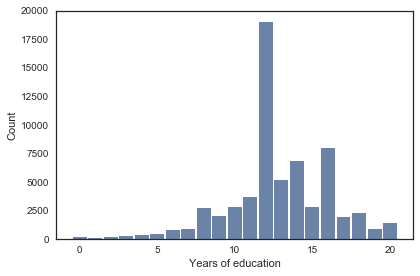

In [153]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count')

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

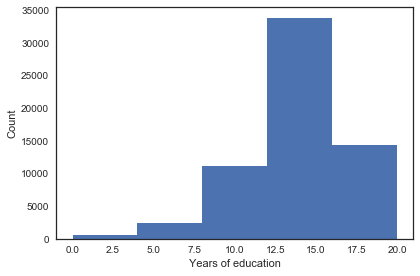

In [154]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna(), bins = 5)
decorate(xlabel='Years of education', 
         ylabel='Count')

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

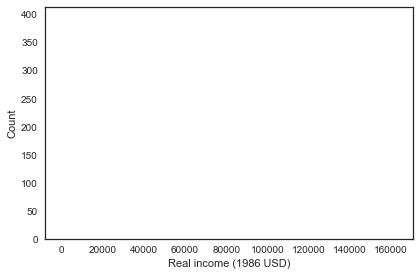

In [155]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

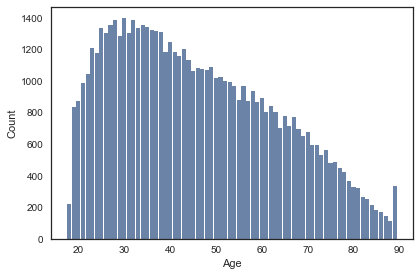

In [156]:
# Solution goes here
ages = Hist(gss.age)
thinkplot.hist(ages)
decorate(xlabel='Age', 
         ylabel='Count')

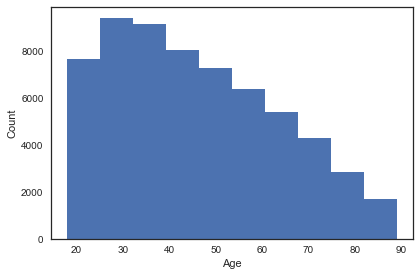

In [157]:
# Solution goes here
plt.hist(gss.age.dropna(), bins = 10)
decorate(xlabel='Age', 
         ylabel='Count')

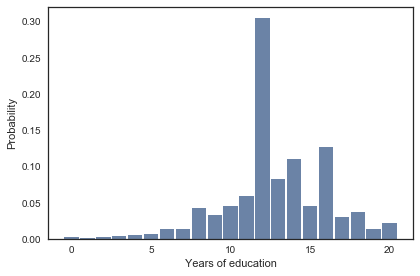

In [158]:
# Solution goes here
edu = Pmf(gss.educ)
thinkplot.hist(edu)
decorate(xlabel='Years of education', 
         ylabel='Probability')

In [181]:
# Solution goes here
print(str(edu[12] * 100) + "% of people have 12 years of education")
print(str(edu[14] * 100) + "% of people have 14 years of education")
print(str(edu[16] * 100) + "% of people have 16 years of education")

30.5111410775% of people have 12 years of education
10.991780646% of people have 14 years of education
12.7223399473% of people have 16 years of education


In [160]:
# Solution goes here

**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

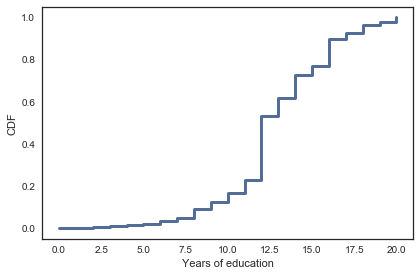

In [184]:
# Solution goes here
eduCdf = Cdf(gss.educ)
thinkplot.cdf(eduCdf)
decorate(xlabel='Years of education', 
         ylabel='CDF')

In [183]:
# Solution goes here
print(str(100 - eduCdf[12.1] * 100) + '% of people have more than 12 years of education')

46.7299171643% of people have more than 12 years of education


In [163]:
# Solution goes here

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

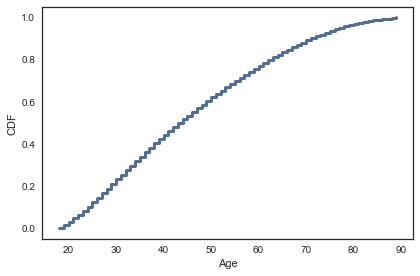

In [185]:
# Solution goes here
ageCdf = Cdf(gss.age)
thinkplot.cdf(ageCdf)
decorate(xlabel='Age', 
         ylabel='CDF')

In [165]:
# Solution goes here
print("The median age is " + str(ageCdf.Value(.5)))

The median age is 44.0


In [166]:
# Solution goes here
iqr = ageCdf.Value(.75) - ageCdf.Value(.25)
print("The IQR is " + str(iqr))

The IQR is 28.0


**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

In [186]:
# Solution goes here
#Maternal education
gss.maeduc.replace([97,98,99], np.nan, inplace= True)



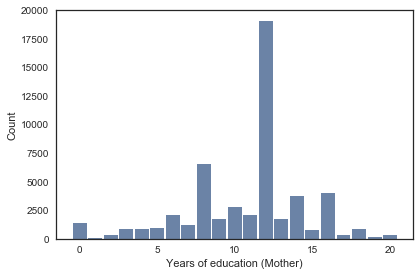

In [187]:
# Solution goes here
hist = Hist(gss.maeduc)
thinkplot.hist(hist)
decorate(xlabel = "Years of education (Mother)",
        ylabel = "Count")

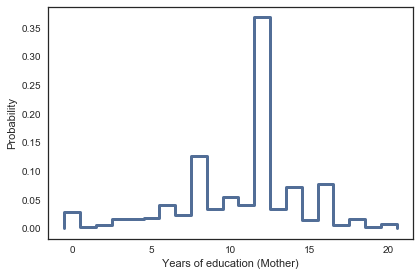

In [169]:
# Solution goes here
pmf = Pmf(gss.maeduc)
thinkplot.pmf(pmf)
decorate(xlabel = "Years of education (Mother)",
        ylabel = "Probability")

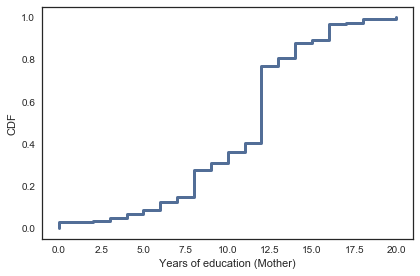

In [170]:
# Solution goes here
cdf = Cdf(gss.maeduc)
thinkplot.cdf(cdf)
decorate(xlabel='Years of education (Mother)', 
         ylabel='CDF')

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

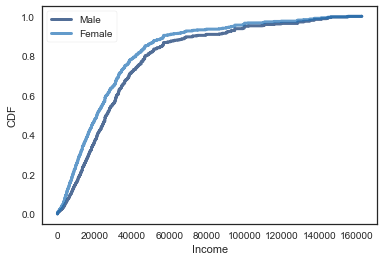

In [171]:
# Solution goes here
male = gss[gss.sex == 1]
female = gss[gss.sex == 2]
mcdf = Cdf(male.realinc, label = "Male")
fcdf = Cdf(female.realinc, label = "Female")
thinkplot.Cdfs([mcdf, fcdf])
thinkplot.Show(xlabel='Income', ylabel='CDF')


In [172]:
# Solution goes here
fmedian = fcdf.Value(.5)
mmedian = mcdf.Value(.5)

#median incomes
print(fmedian)
print(mmedian)

#difference in median incomes
print(mmedian - fmedian)

21299.0
26484.0
5185.0


In [173]:
# Solution goes here

In [174]:
# Solution goes here

**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

In [175]:
# Solution goes here
#Separating by (likely) college education

In [176]:
# Solution goes here
fCollege = female[female.educ >= 16]
fOther = female[female.educ < 16]
mCollege = male[male.educ >= 16]
mOther = male[male.educ < 16]

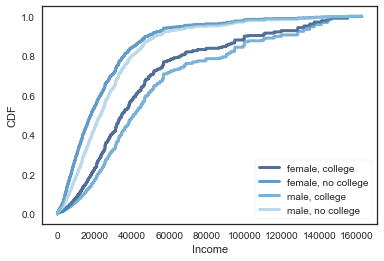

In [177]:
# Solution goes here
fccdf = Cdf(fCollege.realinc, label = "female, college")
focdf = Cdf(fOther.realinc, label = "female, no college")
mccdf = Cdf(mCollege.realinc, label = "male, college")
mocdf = Cdf(mOther.realinc, label = "male, no college")
thinkplot.Cdfs([fccdf, focdf,mccdf, mocdf])
thinkplot.Show(xlabel = 'Income', ylabel = 'CDF')

In [178]:
# Solution goes here
print("Median F college income: " + str(fccdf.Value(.5)))
print("Median F no college income: " + str(focdf.Value(.5)))
print("Median M college income: " + str(mccdf.Value(.5)))
print("Median M no college income: " + str(mocdf.Value(.5)))
print("College income disparity: " + str(mccdf.Value(.5) - fccdf.Value(.5)))
print("No college income disparity: " + str(mocdf.Value(.5) - focdf.Value(.5)))
print("Female college vs. no college gap: " + str(fccdf.Value(.5) - focdf.Value(.5)))

Median F college income: 34413.5
Median F no college income: 18094.0
Median M college income: 40756.5
Median M no college income: 23310.0
College income disparity: 6343.0
No college income disparity: 5216.0
Female college vs. no college gap: 16319.5


## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [179]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [1]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

SyntaxError: invalid syntax (<ipython-input-1-d7b34b5c5488>, line 1)

Load it and see how fast it is!

In [ ]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape